# 인공신경망 (Artificial Neural Network)

## 생물학적 신경세포 : 뉴런 (Neuron)

![Neuron](https://upload.wikimedia.org/wikipedia/commons/b/b5/Neuron.svg)

- **수상돌기 (Dendrite)** : 인접 뉴런으로부터 신경흥분이 세포체로 입력되는 통로 (**Input**).
- **축색돌기 (Axon)** : 가늘고 긴 신경섬유로 신경흥분을 전달하는 역할 (**Output**)
- **세포체 (Cell body)** : 일정시간 동안 입력된 자극을 세포체 내에서 **가중되고 그 값이 임계치 이상이 되면 뉴런이 활성화** 하여 축색돌기로 자극이 전달됨.


## 논리유닛 (Logistic Unit)
생물학젹 신경세포를 모델링한 뉴런이라는 매우 단순한 기능을 하는 유닛 (각 유닛과 가중치 모두 변수화).
유닛을 상호 연결하여 네트워크를 구성할 경우 간단한 논리 연산이 가능

![Logistic Unit](https://ds055uzetaobb.cloudfront.net/image_optimizer/e92a70e431275d0cdaf1d3c01686ea3739770f72.png)

- **입력값(Inputs)**: 변수에 저장하여 수치적으로 설정
- **바이어스**: 신경세포가 가지는 일종의 편견을 바이어스로 구현 (바이어스는 1, 가중치 변경으로 구현)
- **가중치(Weights) (뉴런간의 연결 세기)** : 2차원 배열로 처리 ($w_{ji}$ 여기에서 $i$ = 입력 유닛번호, $j$= 출력 유닛번호)
- **세포체의 기능(Sum)**: 연산자를 통해 구현
    $$\sum_{i=1}^n w_{i} x_i + w_{0} b = w_{1} x_2 +  w_{2} x_2 + \dots + w_{n} x_n  + w_{0}  b$$
- **활성화(Activation)** : 활성화 함수 구현(시그모이드 함수)
$$f(x) = {1 \over {1 + e^{-x}}}$$
<img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg" width=200 height=400>
<br>
<img src="images/neuron-math.jpg" height=400 width=400>

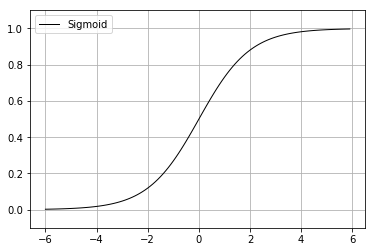

In [146]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-6.0, 6.0, 0.1)
y_sigmoid = sigmoid(x)
plt.plot(x, y_sigmoid, label='Sigmoid', color='k', lw=1, linestyle=None)
plt.ylim(-0.1, 1.1)
plt.grid()
plt.legend()
plt.show()

## AND, OR, NOT 구현
바이어스 입력($x_0 = 1$)을 포함하여 입력이 3 또는 2 개, 출력이 1개인 구조, 연결 가중치 설정이 중요
<img src="https://schwalbe10.github.io/thinkage/images/posts/perceptron.png" width="300" height="200">
### AND
<img src="./images/and.png" align=left width="200">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" width=200 height=400 align="right">


$X_1$ | $X_2$ | g(-30 + 20 $X_1$ + 20 $X_2$ )
----- | ----- | -----------------------------
 0 | 0 | g(-30) $\sim 0 $
 0 | 1 | g(-10) $\sim 0 $
 1 | 0 | g(-10) $\sim 0 $
 1 | 1 | g(10) $\sim 1 $
 
 <br>
 
### OR
<img src="./images/or.png" align=left width="200">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" width=200 height=400 align="right">

$X_1$ | $X_2$ |g(-10 + 20$X_1$ + 20$X_2$)
----- | ----- | --------------------
 0 | 0 | g(-10) $\sim 0$
 0 | 1 | g(10)  $\sim 1$ 
 1 | 0 | g(10)  $\sim 1$ 
 1 | 1 | g(30)  $\sim 1$ 
 
 <br>
 
### NOT
<img src="./images/not.png" align=left width="200">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png" width=200 height=400 align="right">

$X_1$ | g(10 - 20 $X_1$)
----- | --------------------
 0 | g(10) $\sim 1$
 1 | g(-10) $\sim 0$  

- **AND, OR, NOT ** 연산은 **선형 분리 가능한 결정 경계**를 가집니다.
    $w_0 x_0 + w_1 x_1 + w_2 x_2 = 0$ 으로 주어지는 식은 $x_1$와 $x_2$ 을 축으로 하는 평면에서의 선을 나타내는 식이기 때문.
- 따라서 결정 경계가 2개 필요한 **XOR**나 **XNOR** 연산 구현은 1개 층으로는 불가능 (왜냐하면, 입력층과 출력층으로 구성된 단일 층 구조의 신경망은 선형결정 경계만을 구현하기 때문입니다.)
</span>
<img src="https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Logic-Gates.png.webp" width="500" height="150" >

### XNOR 구현 : 2개층 구조로 구현가능
<img src="./images/and-color.png" align=left width="220">
<img src="./images/not-and-color.png" align=left width="220">
<img src="./images/or-color.png" align=left width="220">

<img src="./images/xnor-color.png" align=left width="300">

$x_1$ | $x_2$ | $a_1$ | $a_2$ | $y$ 
----- | ----- | ----- | ----- |----
0 | 0 | 0 | 1 | 1
0 | 1 | 0 | 0 | 0
1 | 0 | 0 | 0 | 0
1 | 1 | 1 | 0 | 1

### 신경망 층의 수와 결정 영역의 특성
<img src="./images/multi-layer.png" width="500" > 
<img src="./images/decision_boundary.png" width="600" > 

## 신경망 다중분류기 (Neural Network multi-class Classification)

<img src="./images/multi-classification-layer.png" width="500" > 

#### 이진분류기 (Binary Classification) : 1 output unit ( y = 0 or 1)

#### 다중분류기 (multi-class Classification) : K output units ( for K-classes ) - one-hot-vector 형태로 정의

eg) for 4 classes $$ y_1 = \begin{bmatrix} 1 \\ 0 \\0 \\0 \end{bmatrix}, y_2 = \begin{bmatrix} 0 \\ 1 \\0 \\0 \end{bmatrix}, y_3 = \begin{bmatrix} 0 \\ 0 \\1 \\0 \end{bmatrix}, y_4 = \begin{bmatrix} 0 \\ 0 \\0 \\1 \end{bmatrix}$$



# 학습/훈련 - 연결강도(Weights) 구하기

- 신경망을 적용할 문제의 성격에 적절한 신경망에 대한 기본적인 구조부분이 다음과 같이 확정이 되고 나면
 - 입력층 노드의 개수, 
 - 출력층 노드의 개수
 - 은닉층의 개수와 그에 대한 각각의 노드의 개수
- 다음단계는 노드들 간의 가중치를 결정하는 학습/훈련 단계이다.
- 전체 학습 데이터에 대한 전체 오차를 최소화하는 방향으로 연결 강도(Weights)를 갱신
- 입력 $x$에 대한 목표 출력이 $y$인 경우, 연결강도에 따른 전체 오차 $J(W)$는 다음과 같이 정의
$$ J(W) = \text{error between target out  } y_k^{(i)} \text{ and computed output  } h(x^{(i)})_k$$
$$ J(W) = - { 1 \over m} \left[ \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log h(x^{(i)})_k + 
(1-y_k^{(i)} )  \log (1-h(x^{(i)})_k)  \right]$$
- 어떻게 오차가 최소가 되는 연결강도 $W$ 를 찾는가? ==> 경사강하법 (Gradient Descent Method)

### 경사강하법


1. 최소 오차점을 찾기 위해서는 오차함수식 $J(W)$ 를 $W$에 관하여 편미분한 결과가 기울기의 크기를 의미함으로
$$ \min_W J(W) $$
2. 그 기울기만큼 $\Delta W$를 이전 연결 강도에서 빼주는 과정을 다음의 식과 같이 반복하면 최소점에 도달할 수 있음. 여기에서 $\alpha$ 를 학습률이라고 부르며, 학습속도에 영향을 준다.
$$  W_{n+1} = W_n - \alpha {\partial J(W) \over \partial W} $$
3. 이러한 방식으로 최적값을 찾아가는 방법을 경사 강하법(gradient descent)이라고 함.

<img src="https://cdn-images-1.medium.com/max/800/1*1eNyZxs_SthrBjvf-RQy7Q.png" width=450>

### 역전파(backpropagation) 알고리즘
- 경사하강범에서의 그라디언트 ${\partial J(W) \over \partial W}$ 는 역전파(backpropagation) 알고리즘으로 구한다.
- 역전파 알고리즘에서 학습은 전향(forward) 단계와 후향(backward) 단계로 이루어진다. 학습에서 중요한 것은 연결 강도의 갱신인데 역전파 알고리즘은 후향 단계에서 연결 강도의 갱신이 이루어진다.
- 전향 단계는 신경 회로망에 입력 패턴(x)을 제시하고, 각 노드에 대해서 입력 함수와 활성화 함수를 이용하여 출력을 산출하는 단계다. 이 때 입력 신호는 전방향, 즉 출력층 방향으로만 전달된다. 초기에 임의로 정한 연결 강도(W)로 인해 출력층에서 출력값과 목표값이 일치하지 않고 큰 오차가 발생하게 된다.
- 후향단계는 역전파 알고리즘으로 그 오차로부터 그라디언트를 구하고, 이를 이용한 적절한 연결강도의 갱신을 수행한다.

<img src="https://image.slidesharecdn.com/lect5-uwa-160515043258/95/artificial-neural-networks-lect5-multilayer-perceptron-backpropagation-13-638.jpg?cb=1463287701" >

## An example for a given one trainnig data (x,y) 
### 전향파 (forward propabation) 알고리즘
<img src="./images/forward.png" width="350" align="right">

<br> 
\begin{eqnarray*}
a^{(1)} & = &x \\ 
z^{(2)} & = &W^{(1)}a^{(1)}  \text{ (add } a_0^{(2)} )\\
a^{(2)} & = &g( z^{(2)} ) \\
z^{(3)} & = &W^{(2)}a^{(2)}  \text{ (add } a_0^{(3)} )\\
a^{(3)} & = &g( z^{(3)} )\\ 
z^{(4)} & = &W^{(3)}a^{(3)} \\
a^{(4)} & = &g( z^{(4)} ) = h(x) \\
\end{eqnarray*}

### 역전파 (backward propabation) 알고리즘

\begin{eqnarray*}
\delta^{(4)} & = & a^{(4)} - y_j \\ 
\delta^{(3)} & = & (W^{(3)})^T \delta^{(4)} .* (a^{(3)} .* (1-a^{(3} ))\\ 
\delta^{(2)} & = & (W^{(2)})^T \delta^{(3)} .* (a^{(2)} .* (1-a^{(2} ))\\ 
\end{eqnarray*}
<br>
<img src="./images/backward.png" width="350">
<br>
$$ {\partial J(W) \over \partial w_{ij}^{(l)}  }= a_j^{(l)}\delta_i^{(l+1)} $$
$$ W_{ij}^{(l)} =  W_{ij}^{(l)} - \alpha {\partial J(W) \over \partial w_{ij}^{(l)} } $$

## (실습예제) 필기숫자인식
MNIST는 훈련 및 시험 세트를 모두 포함하는 필기숫자 이미지들로 유명한 데이터베이스입니다. 이는 기계학습의 정확성을 측정하는데 종종 사용되며, 쉽게 다운로드하여 사용할 수 있습니다. 다음의 python 코드는 단 몇 줄로 완성된 필기숫자이미지 인식 인공신경망 학습 및 시험용 프로그램입니다. 

In [1]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
model = keras.models.Sequential( [
     keras.layers.Flatten(input_shape=(28, 28)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy',    metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 179us/sample - loss: 2.2103 - accuracy: 0.8532
Epoch 2/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.3516 - accuracy: 0.9146
Epoch 3/5
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2709 - accuracy: 0.9312
Epoch 4/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2372 - accuracy: 0.9387
Epoch 5/5
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2252 - accuracy: 0.9423
10000/1 - 1s - loss: 0.2045 - accuracy: 0.9383

테스트 정확도: 0.9383


* 다음의 코드는 핵심적인 내용으로만 쓰여진 위의 코드에 추가하여, 각 단계에서의 결과 확인을 위한 그림 또는 인식 결과등을 포함한 프로그램입니다.  

2.0.0
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2658 - accuracy: 0.9252
Epoch 2/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1169 - accuracy: 0.9657 - loss: 0.1171 
Epoch 3/5
60000/60000 [==============================] - 11s 187us/sa

Text(0.5, 1.0, '0')

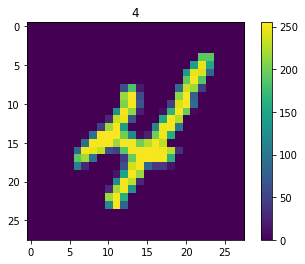

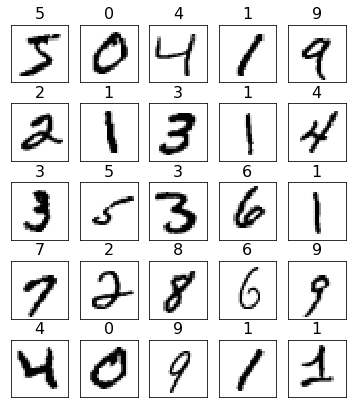

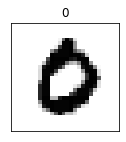

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
plt.figure()
plt.imshow(train_images[9])
plt.title(train_labels[9])
plt.colorbar()
train_images, test_images = train_images / 255.0,  test_images / 255.0

plt.figure(figsize=(6,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(train_labels[i], fontsize=16)
model = keras.models.Sequential( [
     keras.layers.Flatten(input_shape=(28, 28)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy',    metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

predictions = model.predict(test_images)
i=3
print(predictions[i])
np.argmax(predictions[i])

plt.figure(figsize=(2,2))
plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title(np.argmax(predictions[i]))